In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 

In [3]:
df1=pd.read_csv('n7wetR01.csv')
df2=pd.read_csv('n5wetR01.csv')
df3=pd.read_csv('n3wetR01.csv')
df4=pd.read_csv('n1wetR01.csv')
df5=pd.read_csv('0wetR01.csv')
df6=pd.read_csv('p1wetR01.csv')
df7=pd.read_csv('p3wetR01.csv')
df8=pd.read_csv('p5wetR01.csv')
df9=pd.read_csv('p7wetR01.csv')

In [4]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9],axis=0)


In [5]:
df['Disp']=df['ScanData']-df['ExpSrfData']
#df.to_csv('combined_wetdata.csv',index=False)
df.head()

,CurveData,ExpSrfData,ScanData,Disp
0,94.000000,100.000000,100.004489,0.004489
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.800000,1.800000
3,93.685168,99.685168,99.987078,0.301911
4,0.000000,0.000000,0.000000,0.000000


In [6]:
disp=np.array(df['Disp'])
disp=disp.reshape(int(disp.size/3),3)
dispdf=pd.DataFrame(disp,columns=['dx','dy','dz'])

In [7]:
disp

array([[  4.48932197e-03,   0.00000000e+00,   1.80000000e+00],
       [  3.01910595e-01,   0.00000000e+00,   1.89600000e+00],
       [  2.60471564e-01,   0.00000000e+00,   1.99200000e+00],
       ..., 
       [  8.95714109e-01,  -1.56347479e-02,   5.35200000e+00],
       [ -5.68975019e-01,   9.93149590e-03,   5.44800000e+00],
       [ -2.29232821e+00,   4.00127378e-02,   5.54400000e+00]])

c:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


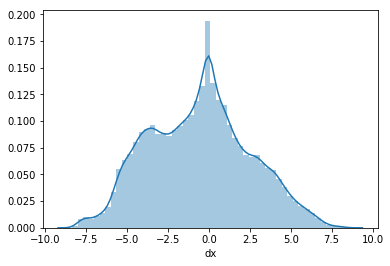

In [22]:
sns.distplot(dispdf['dx'])

In [6]:
x=np.array(df['CurveData'])

In [7]:
y=np.array(df['Disp'])

In [8]:
label_dimension=120

In [9]:
X=x.reshape(int(x.size/label_dimension),label_dimension)
y=y.reshape(int(x.size/label_dimension),label_dimension)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [11]:
scaler=StandardScaler()
scaler.fit(X)
scaledX=scaler.transform(X)
X=scaledX


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)

In [13]:
from tensorflow.contrib.learn import DNNRegressor
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=label_dimension)]
model_dir="D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Wet Disp without p4"

In [14]:
regressor=DNNRegressor(model_dir=model_dir,hidden_units=[100,100],feature_columns=feature_columns,label_dimension=label_dimension)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_num_ps_replicas': 0, '_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_environment': 'local', '_evaluation_master': '', '_tf_random_seed': None, '_task_type': None, '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Wet Disp without p4', '_session_config': None, '_num_worker_replicas': 0, '_is_chief': True, '_save_checkpoints_secs': 600, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000001EC9DB38>, '_save_summary_steps': 100, '_log_step_count_steps': 100}


In [15]:
regressor.fit(X_train,y_train,steps=20000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Sav

INFO:tensorflow:step = 6401, loss = 0.216748 (2.284 sec)
INFO:tensorflow:global_step/sec: 43.3627
INFO:tensorflow:step = 6501, loss = 0.211949 (2.306 sec)
INFO:tensorflow:global_step/sec: 43.2688
INFO:tensorflow:step = 6601, loss = 0.216209 (2.311 sec)
INFO:tensorflow:global_step/sec: 42.587
INFO:tensorflow:step = 6701, loss = 0.226915 (2.347 sec)
INFO:tensorflow:global_step/sec: 43.5326
INFO:tensorflow:step = 6801, loss = 0.210464 (2.298 sec)
INFO:tensorflow:global_step/sec: 44.0503
INFO:tensorflow:step = 6901, loss = 0.213311 (2.270 sec)
INFO:tensorflow:global_step/sec: 43.1382
INFO:tensorflow:step = 7001, loss = 0.207178 (2.317 sec)
INFO:tensorflow:global_step/sec: 42.2809
INFO:tensorflow:step = 7101, loss = 0.208784 (2.366 sec)
INFO:tensorflow:global_step/sec: 41.5259
INFO:tensorflow:step = 7201, loss = 0.206876 (2.408 sec)
INFO:tensorflow:global_step/sec: 39.9498
INFO:tensorflow:step = 7301, loss = 0.20739 (2.502 sec)
INFO:tensorflow:global_step/sec: 41.9263
INFO:tensorflow:step =

INFO:tensorflow:global_step/sec: 40.8807
INFO:tensorflow:step = 14801, loss = 0.140723 (2.446 sec)
INFO:tensorflow:global_step/sec: 43.1382
INFO:tensorflow:step = 14901, loss = 0.155129 (2.317 sec)
INFO:tensorflow:global_step/sec: 43.8379
INFO:tensorflow:step = 15001, loss = 0.145472 (2.282 sec)
INFO:tensorflow:global_step/sec: 41.6643
INFO:tensorflow:step = 15101, loss = 0.141446 (2.400 sec)
INFO:tensorflow:global_step/sec: 42.9898
INFO:tensorflow:step = 15201, loss = 0.168928 (2.326 sec)
INFO:tensorflow:global_step/sec: 42.9713
INFO:tensorflow:step = 15301, loss = 0.137463 (2.328 sec)
INFO:tensorflow:global_step/sec: 44.4222
INFO:tensorflow:step = 15401, loss = 0.143072 (2.287 sec)
INFO:tensorflow:global_step/sec: 42.0851
INFO:tensorflow:step = 15501, loss = 0.144374 (2.338 sec)
INFO:tensorflow:global_step/sec: 43.9342
INFO:tensorflow:step = 15601, loss = 0.150842 (2.277 sec)
INFO:tensorflow:global_step/sec: 44.363
INFO:tensorflow:step = 15701, loss = 0.136723 (2.254 sec)
INFO:tensor

DNNRegressor(params={'dropout': None, 'hidden_units': [100, 100], 'feature_columns': (_RealValuedColumn(column_name='', dimension=120, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x000000001A246320>, 'activation_fn': <function relu at 0x000000001872CEA0>, 'input_layer_min_slice_size': None, 'embedding_lr_multipliers': None, 'gradient_clip_norm': None})

In [17]:
regeval=regressor.evaluate(X_test,y_test,steps=1)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2018-07-06-04:06:16
INFO

In [18]:
regpredict=regressor.predict(X_test,as_iterable=False)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available 

In [19]:
score = metrics.mean_squared_error(regressor.predict(X_test, as_iterable=False), y_test)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available 

In [20]:
score

0.12638343513697856

In [21]:
np.sqrt(metrics.mean_squared_error(y_test,regpredict))

0.35550447977061916

# Predictions

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 
from sklearn.preprocessing import StandardScaler

In [2]:
label_dimension=120
from tensorflow.contrib.learn import DNNRegressor
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=label_dimension)]
#model_dir="D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Wet Disp without p4"
model_dir="Trained Model\\Wet Disp without p4"
regressor=DNNRegressor(model_dir=model_dir,hidden_units=[100,100],feature_columns=feature_columns,label_dimension=label_dimension)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_train_distribute': None, '_save_summary_steps': 100, '_model_dir': 'Trained Model\\Wet Disp without p4', '_log_step_count_steps': 100, '_protocol': None, '_evaluation_master': '', '_device_fn': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002C713F2BE80>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_task_id': 0, '_task_type': None, '_session_config': None, '_save_checkpoints_secs': 600, '_is_chief': True, '_num_worker_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_master': '', '_tf_random_seed': None, '_num_ps_repli

In [3]:
dfp=pd.read_csv("drypathdata_jarron10.csv")

#dfp=df2
Xp=np.array(dfp['CurveData'])
label_dimension=120;
Xp=Xp.reshape(int(Xp.size/label_dimension),label_dimension)
sXp=Xp
scaler2=StandardScaler()
scaler2.fit(sXp)
scaledX2=scaler2.transform(sXp)
sXp=scaledX2

In [4]:
disp=regressor.predict(sXp,as_iterable=False)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available 

In [5]:
disp=disp.reshape(disp.size)
for i in range(2,disp.size,3):
    disp[i]=0
disp=disp.reshape(int(disp.size/label_dimension),label_dimension)    

In [6]:
presetpts=Xp-disp
presetpd=pd.DataFrame(presetpts)
presetpd.info()
presetpd.to_csv('wetpreset_jarron10.csv',index=False, header=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Columns: 120 entries, 0 to 119
dtypes: float64(120)
memory usage: 337.6 KB


# Debugging

In [34]:
disp=disp.reshape(int(disp.size/3),3)
dispdf=pd.DataFrame(disp,columns=['dx','dy','dz'])

c:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


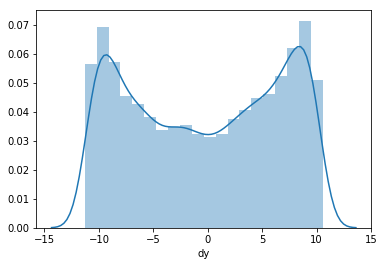

In [39]:
sns.distplot(dispdf['dy'])

In [65]:
g=np.array(pd.read_csv('p4wetpreset.csv')['ScanData']-pd.read_csv('p4wetpreset.csv')['ExpSrfData'])
h=np.array(pd.read_csv('p4wetpreset.csv')['CurveData'])

In [66]:
g=g.reshape(int(g.size/120),120)
h=h.reshape(int(h.size/120),120)
scaler2=StandardScaler()
scaler2.fit(h)
scaledX2=scaler2.transform(h)
h=scaledX2

In [67]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(regressor.predict(h, as_iterable=False),g))

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available 

3.7447756203796905

# Additional Training

In [69]:
df=pd.read_csv('p4wetpreset.csv')
df['Disp']=df['ScanData']-df['ExpSrfData']
x=np.array(df['CurveData'])
y=np.array(df['Disp'])
label_dimension=120
X=x.reshape(int(x.size/label_dimension),label_dimension)
y=y.reshape(int(x.size/label_dimension),label_dimension)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
scaler=StandardScaler()
scaler.fit(X)
scaledX=scaler.transform(X)
X=scaledX
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)
from tensorflow.contrib.learn import DNNRegressor
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=label_dimension)]
model_dir="D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Wet Disp without p4"
regressor=DNNRegressor(model_dir=model_dir,hidden_units=[100,100],feature_columns=feature_columns,label_dimension=label_dimension)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_evaluation_master': '', '_task_id': 0, '_log_step_count_steps': 100, '_tf_random_seed': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000026C53E10>, '_save_summary_steps': 100, '_task_type': None, '_session_config': None, '_is_chief': True, '_environment': 'local', '_save_checkpoints_steps': None, '_num_worker_replicas': 0, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_master': '', '_model_dir': 'D:\\Yadu Dropbox\\Dropbox\\SUTD Masters\\Organic Sam\\18.06.28 Data Extraction\\Trained Model\\Wet Disp'}


In [70]:
regressor.fit(X_train,y_train,steps=2000)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Res

DNNRegressor(params={'hidden_units': [100, 100], 'dropout': None, 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x0000000018721EA0>, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x0000000026C56278>, 'feature_columns': (_RealValuedColumn(column_name='', dimension=120, default_value=None, dtype=tf.float32, normalizer=None),), 'embedding_lr_multipliers': None, 'optimizer': None, 'input_layer_min_slice_size': None})

In [73]:
regeval=regressor.evaluate(X_test,y_test,steps=1)
regpredict=regressor.predict(X_test,as_iterable=False)
np.sqrt(metrics.mean_squared_error(y_test,regpredict))

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2018-07-05-16:21:21
INFO

0.3127623660649792

# Display Surface

In [81]:
g=np.array(pd.read_csv('0dryR01.csv')['ScanData'])
g=g.reshape(int(g.size/120),120)
preddisp=pd.DataFrame(g)
preddisp.info()
preddisp.to_csv('disppred.csv',index=False, header=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Columns: 120 entries, 0 to 119
dtypes: float64(120)
memory usage: 337.6 KB


In [122]:
y.shape

(43200,)